In [23]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("titanic_toy.csv")
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [25]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [41]:
x= df.drop(columns ="Survived")
y=df["Survived"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state =42)

In [28]:
mean_age = int(df["Age"].mean())
mean_fare = int(df["Fare"].mean())
median_age = int(df["Age"].median())
median_fare = int(df["Fare"].median())

In [29]:
x_train["mean_age"]=x_train["Age"].fillna(mean_age)
x_train["median_age"]=x_train["Age"].fillna(median_age)
x_train["mean_fare"]=x_train["Fare"].fillna(mean_fare)
x_train["median_fare"]=x_train["Fare"].fillna(median_fare)

In [30]:
x_train.head()

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
331,45.5,28.5000,0,45.5,45.5,28.5000,28.5000
733,23.0,13.0000,0,23.0,23.0,13.0000,13.0000
382,32.0,7.9250,0,32.0,32.0,7.9250,7.9250
704,26.0,7.8542,1,26.0,26.0,7.8542,7.8542
813,6.0,31.2750,6,6.0,6.0,31.2750,31.2750


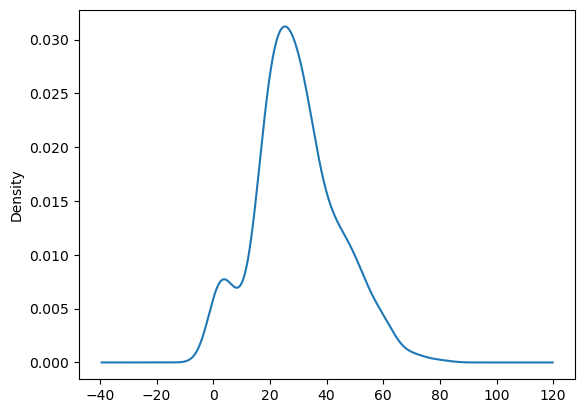

In [31]:
x_train["Age"].plot(kind = "kde") 
plt.show()

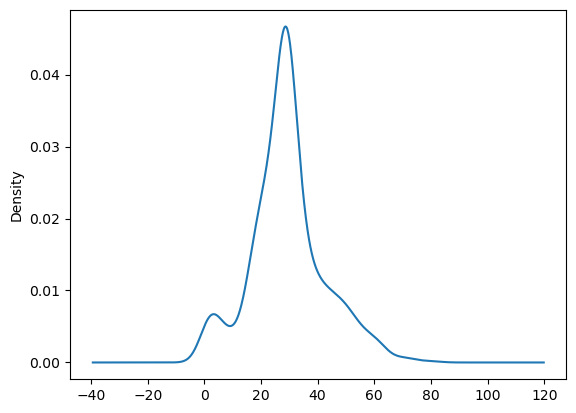

In [34]:
x_train["mean_age"].plot(kind = "kde") 
plt.show()

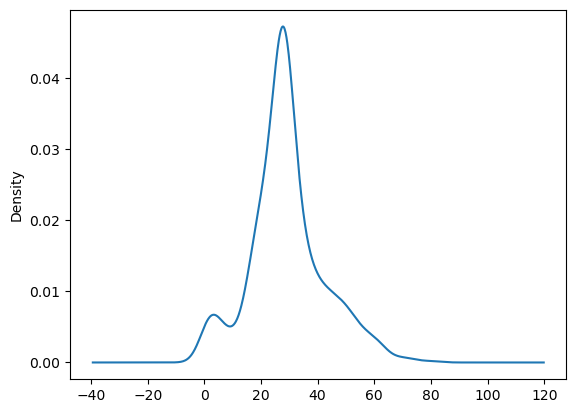

In [35]:
x_train["median_age"].plot(kind = "kde") 
plt.show()

In [38]:
x_train.cov()

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.161997,70.057542
Fare,75.481375,2761.031435,18.599163,61.460549,63.938058,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.606784,-5.587710,17.657851,17.672358
mean_age,210.251707,61.460549,-5.606784,168.891298,168.970210,58.322353,57.409120
median_age,210.251707,63.938058,-5.587710,168.970210,169.207310,60.672904,59.707047
mean_fare,71.161997,2761.031435,17.657851,58.322353,60.672904,2621.245263,2621.693311
median_fare,70.057542,2761.031435,17.672358,57.409120,59.707047,2621.693311,2637.716952


In [39]:
x_train.corr()

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088901,0.087189
Fare,0.091482,1.000000,0.207193,0.089953,0.093496,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256418,-0.255307,0.204985,0.204512
mean_age,1.000000,0.089953,-0.256418,1.000000,0.999533,0.087655,0.086013
median_age,1.000000,0.093496,-0.255307,0.999533,1.000000,0.091103,0.089372
mean_fare,0.088901,1.000000,0.204985,0.087655,0.091103,1.000000,0.997043
median_fare,0.087189,1.000000,0.204512,0.086013,0.089372,0.997043,1.000000


<Axes: >

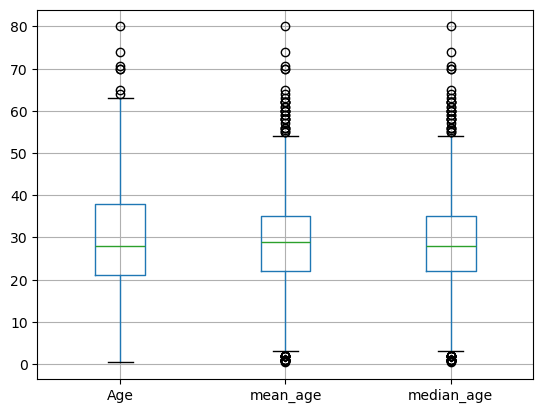

In [40]:
x_train[["Age","mean_age","median_age"]].boxplot()

In [42]:
x= df.drop(columns ="Survived")
y=df["Survived"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state =42)

In [47]:
imputer1 = SimpleImputer(strategy="mean")    # For Age
imputer2 = SimpleImputer(strategy="median")  # For Fare

# Apply with ColumnTransformer
ct = ColumnTransformer([
    ("Imputer1", imputer1, ["Age"]),
    ("Imputer2", imputer2, ["Fare"])
], remainder="passthrough")

In [48]:
ct.fit(x_train)

,transformers,"[('Imputer1', ...), ('Imputer2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [53]:
x_train = ct.fit_transform(x_train)
x_test = ct.fit_transform(x_test)

ValueError: Specifying the columns using strings is only supported for dataframes.